In [12]:
%pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install factor-analyzer

In [19]:
# ==========================
# 1) Cargar datos
# ==========================
df = pd.read_csv("estudiantes_data.csv")   # <-- cambia el nombre a tu archivo
df = df.dropna() 

In [20]:
# Usar solo variables numéricas
X = df.select_dtypes(include=[np.number])
n, p = X.shape
print(f"Data con {n} observaciones y {p} variables")

Data con 2000 observaciones y 15 variables


In [21]:
# ==========================
# 2) Matriz de correlación
# ==========================
R = X.corr().values

# Determinante
detR = np.linalg.det(R)
print("Determinante de la matriz de correlación:", detR)

Determinante de la matriz de correlación: 0.0006374001503641999


Matriz de correlación:
                                Promedio_ponderado  Creditos_matriculados  \
Promedio_ponderado                       1.000000              -0.017277   
Creditos_matriculados                   -0.017277               1.000000   
Porcentaje_creditos_aprobados            0.759831               0.003892   
Cursos_desaprobados                     -0.545440              -0.007881   
Asistencia                               0.844775              -0.004900   
Retiros_cursos                          -0.414440               0.005534   
Edad                                    -0.009869               0.239268   
Horas_trabajo_semana                    -0.005556               0.517112   
Anio_ingreso                             0.006144               0.013158   
Numero_ciclos_academicos                -0.016764               0.456804   
Cursos_matriculados_ciclo                0.011955               0.362876   
Horas_estudio_semana                     0.525167              -

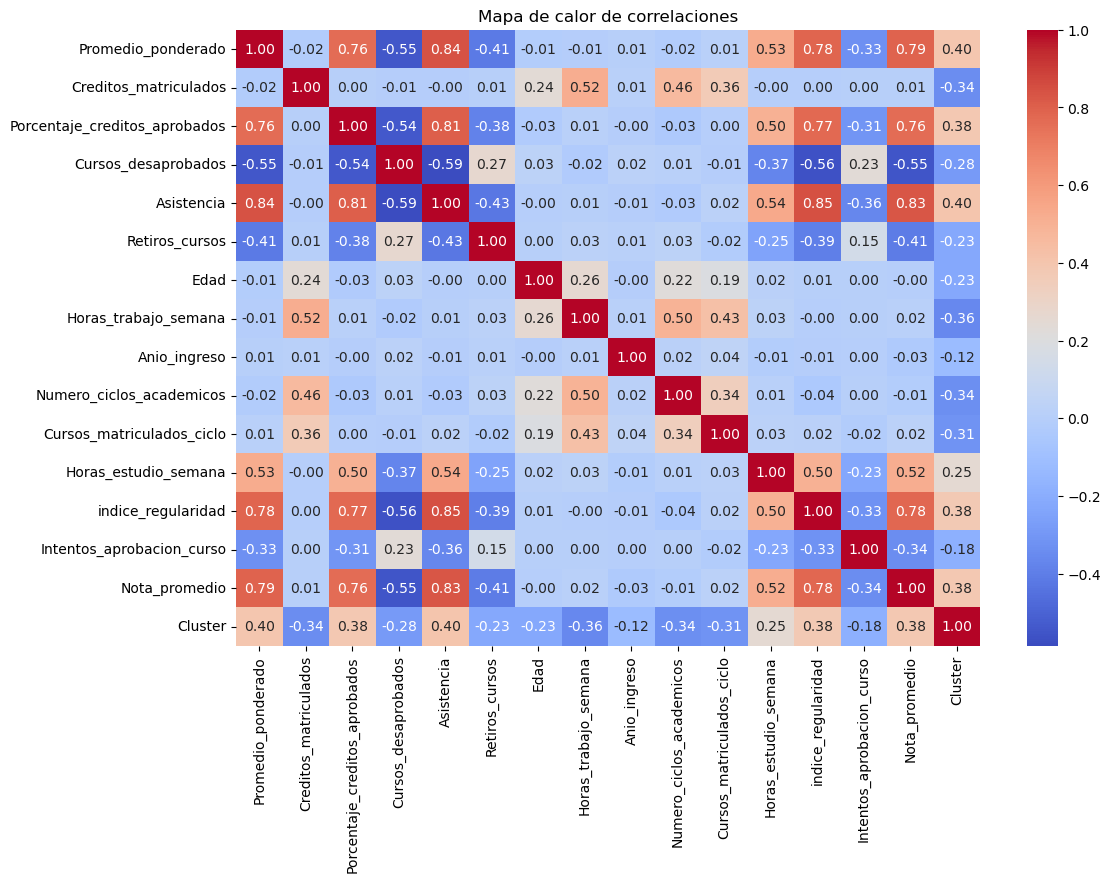

In [40]:
# ==============================
# 2. Matriz de correlación
# ==============================
corr_matrix = data.corr()
print("Matriz de correlación:\n", corr_matrix)

# Heatmap de correlación
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

In [22]:
# ==========================
# 3) Calcular KMO
# ==========================
invR = np.linalg.inv(R)
P = np.zeros_like(R)

# Correlaciones parciales
for i in range(p):
    for j in range(p):
        if i != j:
            P[i, j] = -invR[i, j] / np.sqrt(invR[i, i] * invR[j, j])

# KMO por variable
kmo_num = np.sum(R**2, axis=0) - 1   # excluir la diagonal
kmo_denom = kmo_num + (np.sum(P**2, axis=0) - 1)
kmo_vars = kmo_num / kmo_denom

# KMO global
num = np.sum(np.triu(R**2, 1))
den = num + np.sum(np.triu(P**2, 1))
kmo_global = num / den

print("\nKMO Global:", round(kmo_global, 4))
print("KMO por variable:", np.round(kmo_vars, 4))


KMO Global: 0.927
KMO por variable: [ 1.306500e+00 -4.467000e+00  1.367100e+00  2.127100e+00  1.203000e+00
  5.489374e+02 -2.831000e-01  3.616130e+01 -4.500000e-03 -3.008200e+00
 -1.111000e+00  2.556200e+00  1.305600e+00 -2.350200e+00  1.321400e+00]


In [42]:
print(pca_data.shape)

(2000, 9)


In [25]:
# Aplicar prueba de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(data)

print("Chi-cuadrado Bartlett:", chi_square_value)
print("p-value:", p_value)

NameError: name 'calculate_bartlett_sphericity' is not defined

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar data
data = pd.read_csv("estudiantes_data.csv")
# 1. Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 2. Aplicar PCA (todas las variables)
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

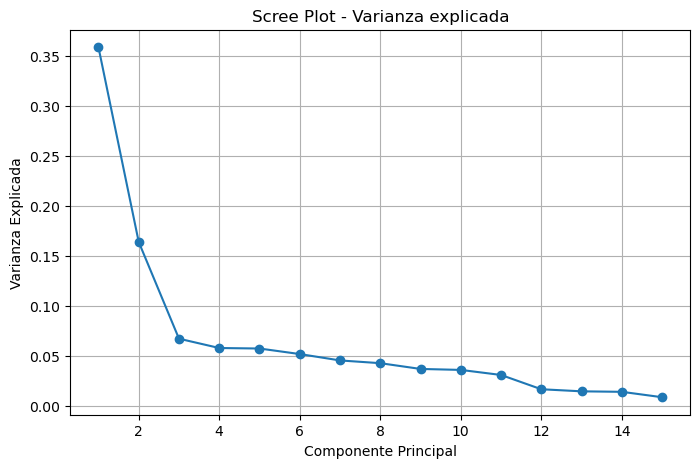

In [30]:
# 3. Scree plot (Varianza explicada por componente)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot - Varianza explicada")
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.grid()
plt.show()


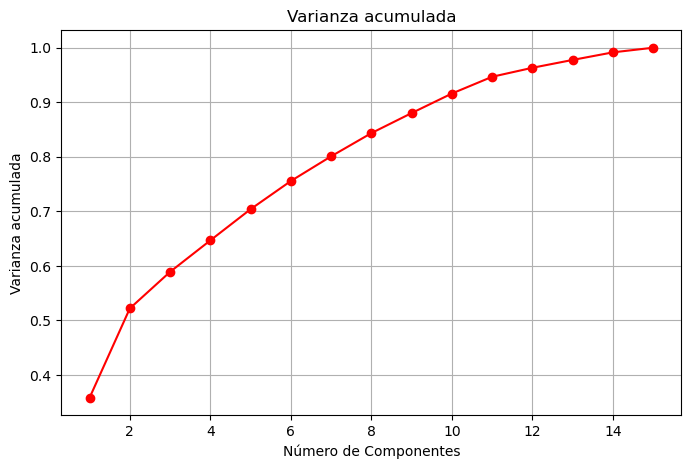

In [31]:
# 4. Varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o', color="red")
plt.title("Varianza acumulada")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza acumulada")
plt.grid()
plt.show()

In [32]:
# 5. Aplicar K-means sobre los primeros componentes (ejemplo: 2)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data[:, :2])  # Solo 2 componentes para graficar

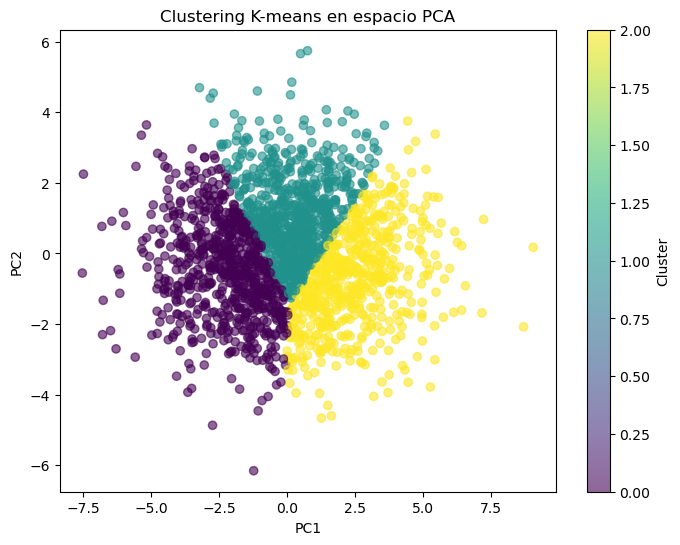

In [33]:
# 6. Graficar clusters en espacio PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap="viridis", alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering K-means en espacio PCA")
plt.colorbar(label="Cluster")
plt.show()

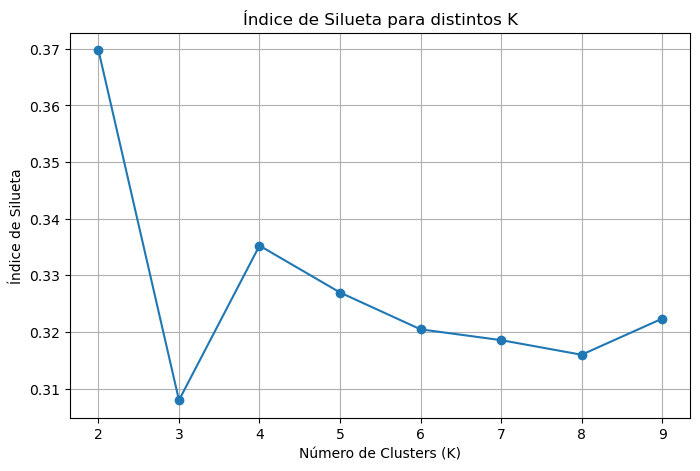

Mejor número de clusters según Silhouette: 2
Índice de Silueta: 0.36975960582553014


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar data
data = pd.read_csv("estudiantes_data.csv")

# Normalizar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# Probar distintos valores de k y calcular índice de silueta
sil_scores = []
K_range = range(2, 10)  # probar de 2 a 9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_data[:, :2])  # usamos las 2 primeras PCs
    score = silhouette_score(pca_data[:, :2], clusters)
    sil_scores.append(score)

# Graficar índice de silueta
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Índice de Silueta para distintos K")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Índice de Silueta")
plt.grid()
plt.show()

# Mejor k según silueta
best_k = K_range[sil_scores.index(max(sil_scores))]
print("Mejor número de clusters según Silhouette:", best_k)
print("Índice de Silueta:", max(sil_scores))


Número de componentes retenidos: 9


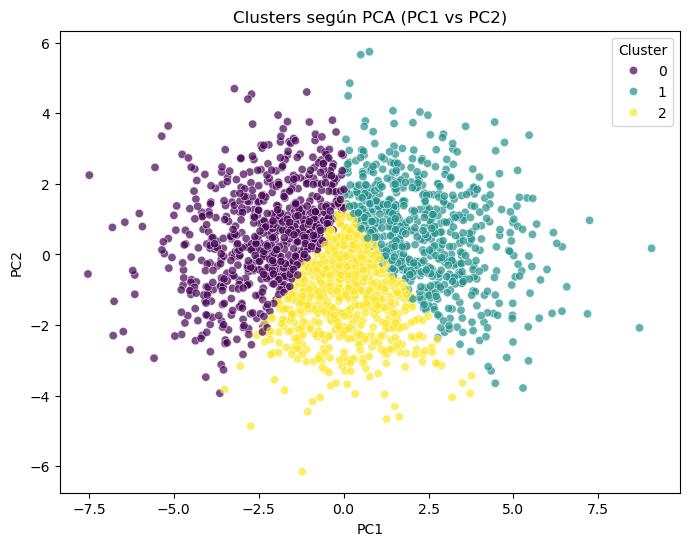

         Promedio_ponderado  Creditos_matriculados  \
Cluster                                              
0                 16.027175              21.702215   
1                 20.172933              21.815998   
2                 18.186117              19.507778   

         Porcentaje_creditos_aprobados  Cursos_desaprobados  Asistencia  \
Cluster                                                                   
0                            70.005182             1.435539   82.421908   
1                            80.426100            -0.246196   94.337782   
2                            75.341145             0.559134   88.497010   

         Retiros_cursos       Edad  Horas_trabajo_semana  Anio_ingreso  \
Cluster                                                                  
0              1.098448  21.410476             18.841565   2015.546921   
1             -0.099476  21.404790             19.029929   2015.518750   
2              0.488578  20.829403             16.141328 

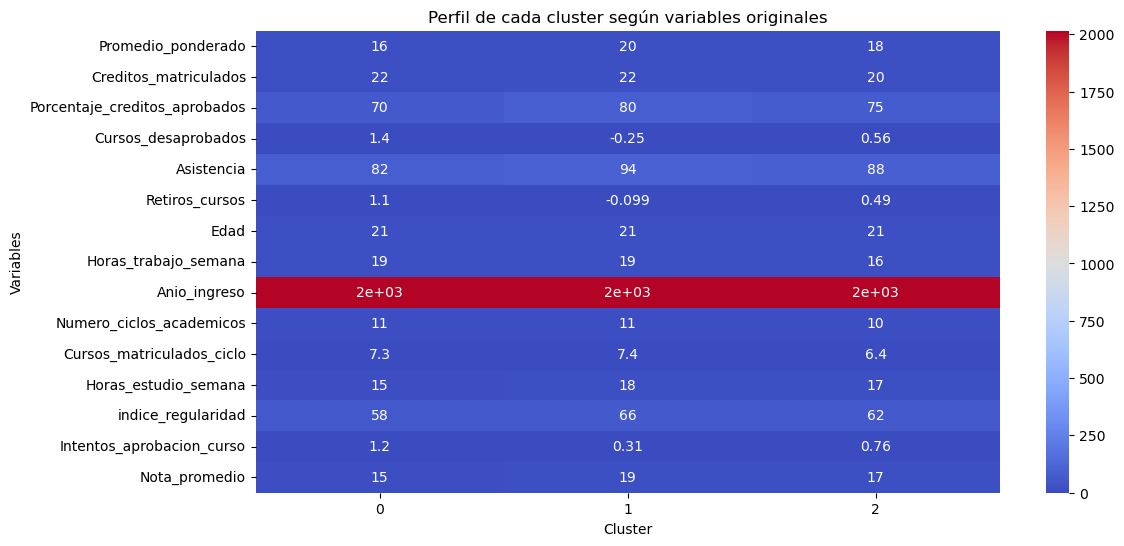

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# ============================
# 1. Cargar y normalizar data
# ============================
data = pd.read_csv("estudiantes_data.csv")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ============================
# 2. PCA
# ============================
pca = PCA(n_components=0.85)  # conservar 85% de la varianza
pca_data = pca.fit_transform(data_scaled)

print("Número de componentes retenidos:", pca.n_components_)

# ============================
# 3. K-means clustering
# ============================
kmeans = KMeans(n_clusters=3, random_state=42)  # puedes ajustar K
clusters = kmeans.fit_predict(pca_data)

# Agregar los clusters a la data original
data["Cluster"] = clusters

# ============================
# 4. Graficar clusters en PC1 y PC2
# ============================
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette="viridis", alpha=0.7)
plt.title("Clusters según PCA (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

# ============================
# 5. Valores promedio por cluster
# ============================
cluster_summary = data.groupby("Cluster").mean()
print(cluster_summary)

# ============================
# 6. Heatmap de perfiles por cluster
# ============================
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.T, annot=True, cmap="coolwarm")
plt.title("Perfil de cada cluster según variables originales")
plt.ylabel("Variables")
plt.xlabel("Cluster")
plt.show()


In [39]:
import pandas as pd

# Suponiendo que ya tienes tu DataFrame 'data' con la columna "Cluster"
cluster_means = data.groupby("Cluster").mean()

# Función para generar descripción automática según algunas variables clave
def describir_cluster(cluster_id, cluster_values):
    descripcion = f"Cluster {cluster_id}: "
    
    # Promedio ponderado
    if cluster_values['Promedio_ponderado'] > 14:
        descripcion += "alto rendimiento académico; "
    elif cluster_values['Promedio_ponderado'] > 12:
        descripcion += "rendimiento intermedio; "
    else:
        descripcion += "bajo rendimiento académico; "
    
    # Asistencia
    if cluster_values['Asistencia'] > 85:
        descripcion += "asistencia alta; "
    elif cluster_values['Asistencia'] > 75:
        descripcion += "asistencia media; "
    else:
        descripcion += "asistencia baja; "
    
    # Cursos desaprobados
    if cluster_values['Cursos_desaprobados'] < 1:
        descripcion += "pocos cursos desaprobados; "
    elif cluster_values['Cursos_desaprobados'] < 2:
        descripcion += "algunos cursos desaprobados; "
    else:
        descripcion += "varios cursos desaprobados; "
    
    # Índice de regularidad
    if 'Índice_regularidad' in cluster_values.index:
        if cluster_values['Índice_regularidad'] > 60:
            descripcion += "índice de regularidad alto."
        elif cluster_values['Índice_regularidad'] > 50:
            descripcion += "índice de regularidad medio."
        else:
            descripcion += "índice de regularidad bajo."
    
    return descripcion

# Generar resumen para todos los clusters
resumen_clusters = {}
for cluster_id, values in cluster_means.iterrows():
    resumen_clusters[cluster_id] = describir_cluster(cluster_id, values)

# Mostrar resumen
for k, v in resumen_clusters.items():
    print(v)


Cluster 0: alto rendimiento académico; asistencia media; algunos cursos desaprobados; 
Cluster 1: alto rendimiento académico; asistencia alta; pocos cursos desaprobados; 
Cluster 2: alto rendimiento académico; asistencia alta; pocos cursos desaprobados; 


In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Cargar datos
data = pd.read_csv("estudiantes_data.csv")

# 2. Normalizar
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 3. PCA (retener 85% de varianza)
pca = PCA(n_components=0.85)
pca_data = pca.fit_transform(data_scaled)

# Crear DataFrame de componentes principales
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]
df_pca = pd.DataFrame(pca_data, columns=pca_columns)

# 4. K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# 5. Unir PCA y cluster al DataFrame original
data_final = pd.concat([data.reset_index(drop=True), df_pca], axis=1)
data_final['Cluster'] = clusters

# 6. Exportar a CSV y Excel
data_final.to_csv("estudiantes_pca_cluster.csv", index=False)
data_final.to_excel("estudiantes_pca_cluster.xlsx", index=False)

print("Exportado CSV y Excel con PCA y Cluster asignado.")


Exportado CSV y Excel con PCA y Cluster asignado.


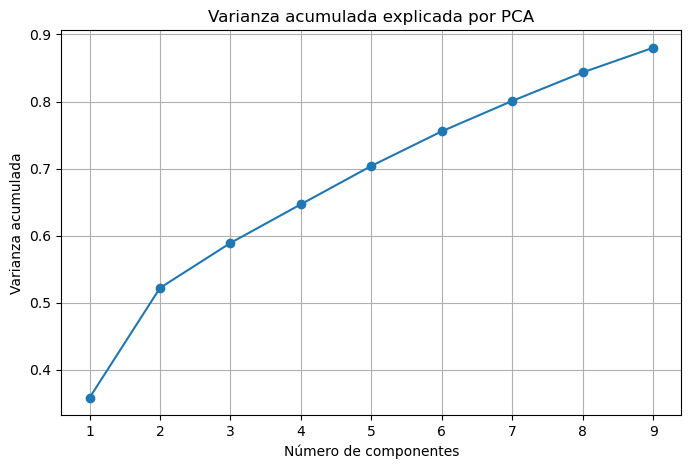

In [44]:
import matplotlib.pyplot as plt

explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_var)+1), explained_var.cumsum(), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.title("Varianza acumulada explicada por PCA")
plt.grid()
plt.show()


In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalizar data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA(n_components=9)  # los PCs que tienes
pca.fit(data_scaled)

# Loadings: cómo contribuye cada variable a cada PC
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=data.columns)
print("Loadings de cada variable en los PCs:\n")
print(loadings)


Loadings de cada variable en los PCs:

                                    PC1       PC2       PC3       PC4  \
Promedio_ponderado             0.387137 -0.005915  0.025302  0.039898   
Creditos_matriculados         -0.001208  0.487338 -0.022592 -0.033117   
Porcentaje_creditos_aprobados  0.377305 -0.005521  0.012266  0.034906   
Cursos_desaprobados           -0.294145 -0.003754  0.027130  0.021362   
Asistencia                     0.402698  0.001095  0.010007  0.016301   
Retiros_cursos                -0.220274  0.013948  0.014085 -0.450038   
Edad                          -0.004327  0.300583 -0.118710  0.376734   
Horas_trabajo_semana           0.003490  0.514575 -0.014545 -0.054860   
Anio_ingreso                  -0.006652  0.026349  0.986868  0.076852   
Numero_ciclos_academicos      -0.012778  0.474672 -0.016768 -0.090982   
Cursos_matriculados_ciclo      0.010063  0.424932  0.086216 -0.046499   
Horas_estudio_semana           0.276766  0.021256 -0.012049 -0.009398   
indice_regul